In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
print("✅ Jupyter Kernel 已正常运行")

✅ Jupyter Kernel 已正常运行


In [3]:
# ✅ 加载已保存模型
from pycaret.regression import load_model

final_model = load_model('et_final_model')
print("✅ 模型加载成功")

Transformation Pipeline and Model Successfully Loaded
✅ 模型加载成功


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# === 加载训练数据 ===
data_re = pd.read_csv(r"D:\lunwen\xunlian.csv")

# 设定自变量和因变量
X = data_re.drop(columns=["O3"], errors='ignore')
y = data_re["O3"]

# 训练集/测试集划分（与模型训练保持一致）
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [5]:
import os
print("📁 当前工作目录：", os.getcwd())

📁 当前工作目录： C:\Users\shila\Desktop\jupyter


In [3]:
import sklearn
sklearn.__version__

'1.1.3'

In [4]:
from pycaret.utils import version
version()

'3.2.0'

In [5]:
import sklearn
sklearn.__version__

'1.1.3'

In [6]:
import pandas as pd
from pycaret.datasets import get_data
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_validate
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#设置图片大小
plt.style.use({"figure.figsize":(25,15)})
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [7]:
data_re = pd.read_csv(r"D:\lunwen\xunlian.csv")
# X=data_re.drop(["POINT_X","POINT_Y","pm_idw","Potential_evaporation","zd_result_pm"],axis=1)
X=data_re.drop(["O3"],axis=1)
y=data_re[["O3"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
X

,LG,LT,DATE,2TM,NDVI,UW,VW,BH,O33,SP,NT,RH,TP,TC,TE,PM25,VOC,NLM,MPD,DEM
0,116.9862,36.6114,1,3.632000,0.227689,0.539229,0.523644,699.559021,0.153875,100756.0,-8980800.0,18.225800,0.000000,0.264245,-0.001503,410.717987,2242.260010,20.299630,10929.400390,110.894997
1,116.9376,36.6650,1,4.523010,0.221204,0.641859,0.660945,703.940002,0.154689,101389.0,-9273960.0,17.529301,0.000000,0.256891,-0.001470,447.476990,2455.760010,20.299630,6495.160156,29.708799
2,117.1265,36.6734,1,3.731995,0.290334,0.672084,0.528891,705.215027,0.155561,100561.0,-9000820.0,18.760401,0.000000,0.255413,-0.001533,487.355988,2688.800049,20.299630,1353.310059,101.977997
3,117.0624,36.6868,1,4.121002,0.305584,0.655154,0.614816,706.242004,0.155263,101044.0,-9131710.0,18.534800,0.000000,0.252868,-0.001530,398.243988,2158.100098,20.299630,19516.199220,44.368401
4,116.9489,36.6447,1,3.984985,0.234087,0.550554,0.556881,701.062012,0.153662,101049.0,-9079120.0,17.364800,0.000000,0.263281,-0.001470,502.351990,2786.129883,20.299630,10017.700200,51.803501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155085,120.4722,30.0415,365,12.165985,0.006863,1.017420,0.783190,525.768982,0.126384,101733.0,-3983430.0,76.607002,0.001010,0.964655,-0.002274,268.609985,6563.419922,22.103089,894.036987,9.270410
155086,120.6153,30.0764,365,12.377014,0.008060,1.089960,0.748397,568.247986,0.126297,102134.0,-4108090.0,75.962097,0.000879,0.954211,-0.002193,311.618012,8949.259766,22.103089,3890.290039,7.154120
155087,119.6470,29.0770,365,11.760010,-0.005139,0.459826,0.150292,361.763000,0.124707,100773.0,-3989460.0,83.935799,0.000235,0.988360,-0.001844,342.084992,2216.320068,22.103089,7209.560059,45.369202
155088,119.6860,29.1029,365,11.815002,0.000860,0.484147,0.156043,354.980988,0.125142,100717.0,-4025880.0,84.509102,0.000201,0.989439,-0.001880,260.298004,1774.310059,22.103089,1054.699951,51.110401


In [8]:
data_re.shape

(155090, 21)

In [9]:
X.shape

(155090, 20)

In [10]:
data_re.isnull().sum()

LG      0
LT      0
DATE    0
2TM     0
NDVI    0
UW      0
VW      0
BH      0
O33     0
SP      0
NT      0
RH      0
TP      0
TC      0
TE      0
PM25    0
VOC     0
NLM     0
MPD     0
DEM     0
O3      0
dtype: int64

In [11]:
#查看缺失值
X.isnull().sum()

LG      0
LT      0
DATE    0
2TM     0
NDVI    0
UW      0
VW      0
BH      0
O33     0
SP      0
NT      0
RH      0
TP      0
TC      0
TE      0
PM25    0
VOC     0
NLM     0
MPD     0
DEM     0
dtype: int64

In [12]:
from scipy.interpolate import interp1d
from pycaret.regression import *

In [13]:
from pycaret import regression
# regression_setup = regression.setup(data= data_re,target="zd_result_pm",train_size= 0.8,fold_shuffle=True,session_id = 2)
regression_setup = regression.setup(data= data_re,target="O3",session_id=2,fold_shuffle=True)

,Description,Value
0,Session id,2
1,Target,O3
2,Target type,Regression
3,Original data shape,"(155090, 21)"
4,Transformed data shape,"(155090, 21)"
5,Transformed train set shape,"(108563, 21)"
6,Transformed test set shape,"(46527, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [ ]:
regression_et = regression.create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:15:17
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.2051,152.9328,12.3666,0.9355,0.1216,0.0811
1,8.4104,166.8938,12.9187,0.9282,0.1374,0.0882
2,8.2268,145.4613,12.0607,0.9366,0.1277,0.0860
3,8.2736,160.7121,12.6772,0.9304,0.1206,0.0814
4,8.4155,169.8788,13.0338,0.9273,0.1279,0.0847
5,8.3622,173.9970,13.1908,0.9260,0.1240,0.0824
6,8.3436,154.0035,12.4098,0.9351,0.1203,0.0815
7,8.3031,161.5352,12.7097,0.9312,0.1350,0.0952
8,8.3120,159.4700,12.6281,0.9332,0.1258,0.0834


In [16]:
regression_rf = regression.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.0017,181.5893,13.4755,0.9234,0.1306,0.0897
1,9.1109,189.2449,13.7566,0.9186,0.1408,0.0949
2,8.9273,169.8630,13.0331,0.9259,0.1363,0.0936
3,8.9978,179.2561,13.3887,0.9224,0.1300,0.0897
4,9.0853,188.1421,13.7165,0.9195,0.1341,0.0920
5,9.1501,200.5971,14.1632,0.9147,0.1330,0.0911
6,9.0623,177.2065,13.3119,0.9253,0.1277,0.0888
7,8.9171,178.2882,13.3525,0.9240,0.1398,0.1016
8,9.0943,185.8550,13.6329,0.9221,0.1347,0.0918


In [17]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.0017,181.5893,13.4755,0.9234,0.1306,0.0897
1,9.1109,189.2449,13.7566,0.9186,0.1408,0.0949
2,8.9273,169.8630,13.0331,0.9259,0.1363,0.0936
3,8.9978,179.2561,13.3887,0.9224,0.1300,0.0897
4,9.0853,188.1421,13.7165,0.9195,0.1341,0.0920
5,9.1501,200.5971,14.1632,0.9147,0.1330,0.0911
6,9.0623,177.2065,13.3119,0.9253,0.1277,0.0888
7,8.9171,178.2882,13.3525,0.9240,0.1398,0.1016
8,9.0943,185.8550,13.6329,0.9221,0.1347,0.0918


In [18]:
tregression_cat = regression.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.1391,319.8234,17.8836,0.8651,0.1764,0.1341
1,13.1816,331.8361,18.2164,0.8572,0.1844,0.1383
2,13.0607,316.1194,17.7797,0.8622,0.1813,0.1374
3,13.2116,320.0122,17.8889,0.8615,0.1786,0.1363
4,13.3042,332.8916,18.2453,0.8575,0.1823,0.1380
5,13.1909,336.9859,18.3572,0.8567,0.1776,0.1345
6,13.1907,320.3128,17.8973,0.8650,0.1764,0.1339
7,13.1208,319.3365,17.8700,0.8639,0.1831,0.1448
8,13.2332,331.8386,18.2164,0.8609,0.1806,0.1357


In [19]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.1391,319.8234,17.8836,0.8651,0.1764,0.1341
1,13.1816,331.8361,18.2164,0.8572,0.1844,0.1383
2,13.0607,316.1194,17.7797,0.8622,0.1813,0.1374
3,13.2116,320.0122,17.8889,0.8615,0.1786,0.1363
4,13.3042,332.8916,18.2453,0.8575,0.1823,0.1380
5,13.1909,336.9859,18.3572,0.8567,0.1776,0.1345
6,13.1907,320.3128,17.8973,0.8650,0.1764,0.1339
7,13.1208,319.3365,17.8700,0.8639,0.1831,0.1448
8,13.2332,331.8386,18.2164,0.8609,0.1806,0.1357


In [20]:
best = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.3433,161.6931,12.7112,0.9311,0.1273,0.0852,17.0540
rf,Random Forest Regressor,9.0581,184.2256,13.5695,0.9215,0.1346,0.0929,42.2620
catboost,CatBoost Regressor,13.1844,326.2884,18.0623,0.8609,0.1802,0.1371,9.6230
dt,Decision Tree Regressor,12.3391,395.3726,19.8833,0.8314,0.1898,0.1212,0.7480
lightgbm,Light Gradient Boosting Machine,15.3912,429.7251,20.7293,0.8168,0.2070,0.1628,0.7900
gbr,Gradient Boosting Regressor,18.7326,630.9251,25.1176,0.7310,0.2414,0.1971,13.9110
lr,Linear Regression,23.6513,953.5978,30.8798,0.5934,0.2940,0.2487,0.1210
lar,Least Angle Regression,23.6513,953.5978,30.8798,0.5934,0.2940,0.2487,0.0700
br,Bayesian Ridge,23.6534,953.6033,30.8798,0.5934,0.2941,0.2488,0.1110
ridge,Ridge Regression,23.8119,960.3190,30.9884,0.5906,0.2995,0.2520,0.0590


In [21]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=2)


In [22]:
et_xgb = regression.create_model('et',
    max_features='sqrt',  # ← 改了这里
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=-1,
    random_state=4428
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.8770,175.8746,13.2618,0.9258,0.1306,0.0888
1,8.9882,186.4666,13.6553,0.9198,0.1440,0.0951
2,8.8665,167.4926,12.9419,0.9270,0.1353,0.0931
3,8.9196,181.1531,13.4593,0.9216,0.1288,0.0887
4,9.0937,192.1528,13.8619,0.9178,0.1364,0.0927
5,9.0262,197.2648,14.0451,0.9161,0.1315,0.0898
6,8.9804,176.0473,13.2683,0.9258,0.1289,0.0887
7,9.0384,182.9092,13.5244,0.9221,0.1422,0.1031
8,8.9591,184.0095,13.5650,0.9229,0.1336,0.0904


In [23]:
predict_model(et_xgb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,8.7394,171.6184,13.1003,0.9269,0.1301,0.0881


,LG,LT,DATE,2TM,NDVI,UW,VW,BH,O33,SP,...,TP,TC,TE,PM25,VOC,NLM,MPD,DEM,O3,prediction_label
100986,119.946404,30.049400,237,16.337006,0.771621,-0.987454,-2.262610,686.648987,0.119509,100630.000000,...,3.931260e-05,0.736592,-0.002245,149.136993,1773.000000,22.103088,3181.659912,20.116501,174,147.43
130717,117.056602,32.653099,308,2.938995,0.023828,-1.962130,-0.864366,337.194000,0.126331,103038.000000,...,4.351140e-07,0.071562,-0.000614,223.201004,877.328979,13.039226,13399.299805,24.687799,89,82.08
150827,120.075104,30.866899,355,13.035004,0.157494,1.725930,-1.972390,763.914978,0.116394,101798.000000,...,1.257760e-03,0.443696,-0.002468,101.301003,2667.209961,22.103088,11498.799805,5.008050,92,94.04
114525,119.930000,28.458599,269,15.997986,0.031632,-0.971338,0.750218,455.968994,0.106763,98044.796875,...,1.171560e-04,0.492693,-0.000887,56.436001,422.009003,22.103088,5213.120117,109.734001,69,68.33
6135,116.565201,37.331902,15,15.604004,0.076527,0.353078,2.541890,433.583008,0.150565,100655.000000,...,0.000000e+00,0.777288,-0.001924,150.654007,560.921021,20.299629,5812.120117,19.022800,126,134.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47265,115.972099,28.703100,110,24.845001,0.015052,-0.309909,1.489020,378.848999,0.136506,100268.000000,...,3.607430e-02,0.766079,-0.000939,443.558990,2139.419922,6.249085,1180.859985,18.662399,61,61.11
40551,120.490601,30.086100,94,24.635010,0.064281,-1.490110,1.293990,351.716003,0.136045,99959.000000,...,1.414150e-06,0.692690,-0.004189,255.029007,6105.259766,22.103088,8751.480469,8.292080,173,174.25
52225,116.830498,32.772701,122,29.423004,0.304078,-0.513763,1.281040,566.038025,0.141906,100133.000000,...,1.432240e-03,0.916039,-0.005104,162.852997,464.329010,13.039226,1458.270020,21.527599,160,149.10
12951,120.366402,36.103199,31,8.278992,-0.086111,0.476569,-5.581140,766.512024,0.149770,102817.000000,...,0.000000e+00,0.010337,-0.002672,1374.709961,7757.229980,20.299629,47617.398438,37.901699,104,103.33


In [24]:
et = create_model('et')
# rf = create_model('rf')
# catboost = create_model('catboost')
# xgboost = create_model('xgboost')
# lightgbm = create_model('lightgbm')
# lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.2051,152.9328,12.3666,0.9355,0.1216,0.0811
1,8.4104,166.8938,12.9187,0.9282,0.1374,0.0882
2,8.2268,145.4613,12.0607,0.9366,0.1277,0.0860
3,8.2736,160.7121,12.6772,0.9304,0.1206,0.0814
4,8.4155,169.8788,13.0338,0.9273,0.1279,0.0847
5,8.3622,173.9970,13.1908,0.9260,0.1240,0.0824
6,8.3436,154.0035,12.4098,0.9351,0.1203,0.0815
7,8.3031,161.5352,12.7097,0.9312,0.1350,0.0952
8,8.3120,159.4700,12.6281,0.9332,0.1258,0.0834


In [25]:
predict_model(et)
# predict_model(rf)
# predict_model(catboost)
# predict_model(xgboost)
# predict_model(lightgbm)
# predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,8.1183,150.9742,12.2872,0.9357,0.1229,0.0813


,LG,LT,DATE,2TM,NDVI,UW,VW,BH,O33,SP,...,TP,TC,TE,PM25,VOC,NLM,MPD,DEM,O3,prediction_label
100986,119.946404,30.049400,237,16.337006,0.771621,-0.987454,-2.262610,686.648987,0.119509,100630.000000,...,3.931260e-05,0.736592,-0.002245,149.136993,1773.000000,22.103088,3181.659912,20.116501,174,153.88
130717,117.056602,32.653099,308,2.938995,0.023828,-1.962130,-0.864366,337.194000,0.126331,103038.000000,...,4.351140e-07,0.071562,-0.000614,223.201004,877.328979,13.039226,13399.299805,24.687799,89,83.38
150827,120.075104,30.866899,355,13.035004,0.157494,1.725930,-1.972390,763.914978,0.116394,101798.000000,...,1.257760e-03,0.443696,-0.002468,101.301003,2667.209961,22.103088,11498.799805,5.008050,92,94.00
114525,119.930000,28.458599,269,15.997986,0.031632,-0.971338,0.750218,455.968994,0.106763,98044.796875,...,1.171560e-04,0.492693,-0.000887,56.436001,422.009003,22.103088,5213.120117,109.734001,69,69.67
6135,116.565201,37.331902,15,15.604004,0.076527,0.353078,2.541890,433.583008,0.150565,100655.000000,...,0.000000e+00,0.777288,-0.001924,150.654007,560.921021,20.299629,5812.120117,19.022800,126,132.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47265,115.972099,28.703100,110,24.845001,0.015052,-0.309909,1.489020,378.848999,0.136506,100268.000000,...,3.607430e-02,0.766079,-0.000939,443.558990,2139.419922,6.249085,1180.859985,18.662399,61,58.24
40551,120.490601,30.086100,94,24.635010,0.064281,-1.490110,1.293990,351.716003,0.136045,99959.000000,...,1.414150e-06,0.692690,-0.004189,255.029007,6105.259766,22.103088,8751.480469,8.292080,173,182.23
52225,116.830498,32.772701,122,29.423004,0.304078,-0.513763,1.281040,566.038025,0.141906,100133.000000,...,1.432240e-03,0.916039,-0.005104,162.852997,464.329010,13.039226,1458.270020,21.527599,160,144.34
12951,120.366402,36.103199,31,8.278992,-0.086111,0.476569,-5.581140,766.512024,0.149770,102817.000000,...,0.000000e+00,0.010337,-0.002672,1374.709961,7757.229980,20.299629,47617.398438,37.901699,104,103.02


In [26]:
final_model = finalize_model(et)
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['LG', 'LT', 'DATE', '2TM', 'NDVI',
                                             'UW', 'VW', 'BH', 'O33', 'SP',
                                             'NT', 'RH', 'TP', 'TC', 'TE',
                                             'PM25', 'VOC', 'NLM', 'MPD',
                                             'DEM'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=2))])


In [27]:
# ✅ 保存模型（只需运行一次，保存后就不用重复训练）
from pycaret.regression import save_model

save_model(final_model, 'et_final_model')  # 保存为 et_final_model.pkl
print("✅ 模型已保存为 et_final_model.pkl")

Transformation Pipeline and Model Successfully Saved
✅ 模型已保存为 et_final_model.pkl


In [11]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

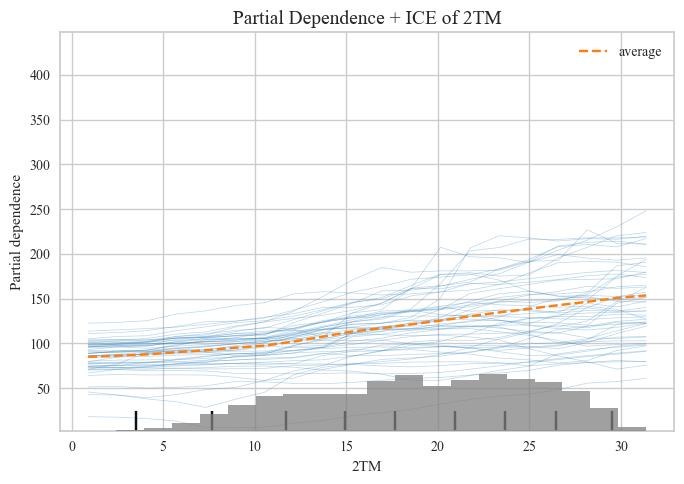

In [12]:
# 设置字体为 Times New Roman
plt.rcParams.update({'font.family': 'Times New Roman'})

# 创建主图画布
fig, ax_main = plt.subplots(figsize=(7, 5))

# PDP + ICE 曲线绘制到主图
display = PartialDependenceDisplay.from_estimator(
    final_model,
    X_train,
    features=['2TM'],
    kind="both",                # ✅ 保留 ICE
    grid_resolution=20,
    subsample=50,
    ax=ax_main
)

# 设置主图样式
ax_main.set_ylim(50, 200)       # ✅ 限制 Y 轴范围
ax_main.set_ylabel("Predicted O₃", fontsize=12)
ax_main.set_title("Partial Dependence + ICE of 2TM", fontsize=14)
ax_main.tick_params(axis='both', labelsize=10)

# === 内嵌直方图 ===
# 嵌入主图底部（如你上传图中的位置）
inset_ax = inset_axes(ax_main,
                      width="100%", height="15%",  # 宽度100%，高度占主图15%
                      loc='lower center',
                      bbox_to_anchor=(0, 0, 1, 1),
                      bbox_transform=ax_main.transAxes,
                      borderpad=0)

# 绘制灰色直方图表示 2TM 分布
sns.histplot(X_train['2TM'], bins=20, ax=inset_ax,
             color="gray", edgecolor=None)

# 隐藏直方图坐标轴元素（干净美观）
inset_ax.axis("off")

# 保存 + 展示
plt.tight_layout()
plt.savefig("D:/lunwen2/PDP_ICE_2TM_embedded_final.jpg", dpi=300)
plt.show()

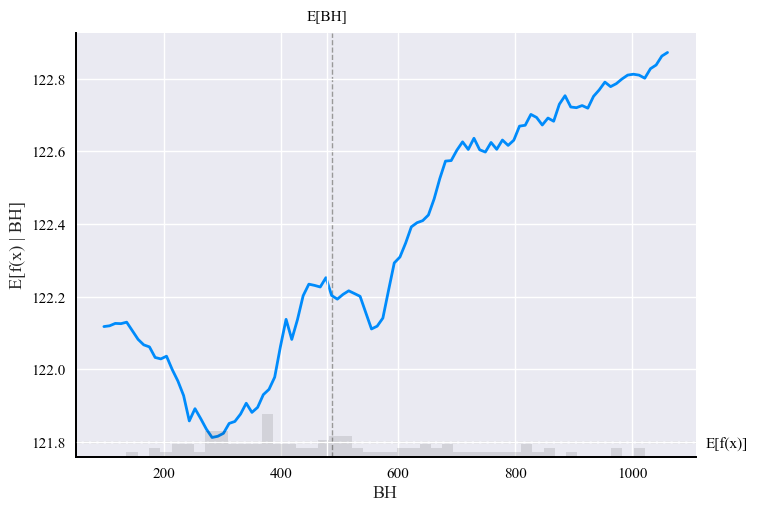

In [62]:
import shap
import pandas as pd

# === 抽取部分数据用于解释（避免计算太慢）===
X_sample = X_train.sample(n=100, random_state=42)

# === 画 PDP 图（只看主线）===
shap.plots.partial_dependence(
    ind="BH",                            # 特征名称
    model=final_model.predict,           # 使用模型的 predict 函数
    data=X_sample,                       # 子样本数据
    ice=False,                           # False = PDP 只画主线
    model_expected_value=True,           # 显示 E[f(x)] 参考线
    feature_expected_value=True          # 显示 E[2TM] 参考线
)

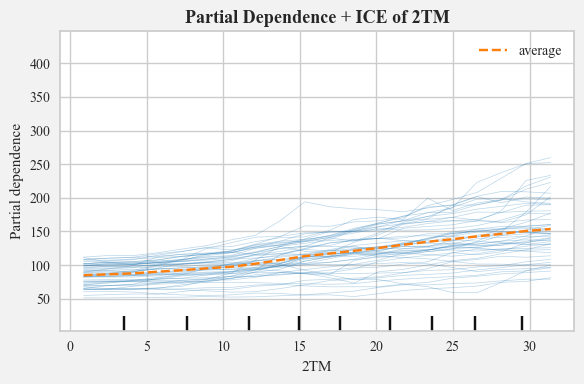

In [17]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4), facecolor="#f2f2f2")  # ✅ 设置背景色

PartialDependenceDisplay.from_estimator(
    final_model, X_train, features=["2TM"],
    kind="both", grid_resolution=20, subsample=50,
    ax=ax
)

# ✅ 设置边框颜色、坐标轴样式
ax.spines['top'].set_color("black")
ax.spines['bottom'].set_color("black")
ax.spines['left'].set_color("black")
ax.spines['right'].set_color("black")

# ✅ 自定义字体等
plt.title("Partial Dependence + ICE of 2TM", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

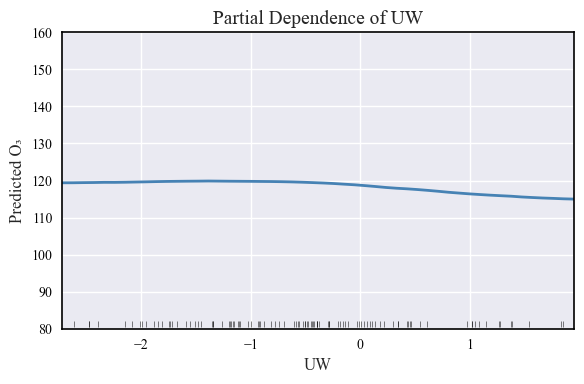

In [41]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt
import numpy as np

# === 提取 PDP 值 ===
pdp_result = partial_dependence(final_model, X=X_train, features=["UW"], grid_resolution=50)
x_vals = pdp_result['values'][0]
y_vals = pdp_result['average'][0]

# === 自定义绘图 ===
plt.rcParams.update({'font.family': 'Times New Roman'})

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_facecolor('#EAEAF2')  # 浅灰背景

# PDP 主线
ax.plot(x_vals, y_vals, color='steelblue', linewidth=2)

# Rug mark（优化）
rug_vals = X_train["UW"]
rug_vals = rug_vals[(rug_vals >= min(x_vals)) & (rug_vals <= max(x_vals))]
if len(rug_vals) > 100:
    rug_vals = rug_vals.sample(n=100, random_state=42)

ax.vlines(
    rug_vals,
    ymin=80.5, ymax=82,
    color='black',
    linewidth=0.5,
    alpha=0.7,
    zorder=4
)

# ✅ 设置坐标轴范围为 shap 风格图的坐标
ax.set_xlim(-10, 35)
ax.set_ylim(80, 165)

# 设置 y 轴范围
ax.set_ylim(80, 160)
ax.set_xlim(min(x_vals), max(x_vals))

# 其他样式
ax.set_title("Partial Dependence of UW", fontsize=14)
ax.set_xlabel("UW", fontsize=12)
ax.set_ylabel("Predicted O₃", fontsize=12)
ax.tick_params(axis='both', labelsize=10)
ax.grid(True)

plt.tight_layout()
plt.savefig("D:/lunwen2/pictures/PDP/UW.jpg", dpi=300)
plt.show()

In [ ]:
import shap
import numpy as np
import pandas as pd
import gc

# ✅ 抽样部分训练数据（建议200条以内）
X_sample = X_train.sample(n=200, random_state=42)

# ✅ 初始化 SHAP 解释器（用 approximate 模式）
explainer = shap.TreeExplainer(raw_model, X_sample, approximate=True)

# ✅ 安全计算 SHAP 值
shap_values = explainer.shap_values(X_sample)

# ✅ 输出 Top 6 特征
shap_importance = pd.DataFrame({
    'feature': X_sample.columns,
    'importance': np.abs(shap_values).mean(axis=0)
}).sort_values(by='importance', ascending=False)

top6 = shap_importance.head(6)['feature'].tolist()
print("📊 Top 6 特征：", top6)

# ✅ 保存重要性结果
shap_importance.to_csv("D:/lunwen/shap_importance_top6.csv", index=False)

# ✅ 清理内存
del explainer, shap_values
gc.collect()


In [ ]:
from econml.dml import CausalForestDML
from sklearn.ensemble import ExtraTreesRegressor
from tqdm import tqdm

df = pd.read_csv("D:/lunwen/xunlian.csv").dropna(subset=['O3', '2TM', 'LG', 'LT'])
grouped = df.groupby(['LG', 'LT'])
cf_results = []

for (lg, lt), group in tqdm(grouped, desc="训练 CF 模型"):
    if len(group) < 30:
        continue

    X = group[top_vars].astype('float32')
    T = group['2TM'].astype('float32')
    y = group['O3'].astype('float32')

    model_y = ExtraTreesRegressor(n_estimators=50, max_depth=15, random_state=42)
    model_t = ExtraTreesRegressor(n_estimators=50, max_depth=15, random_state=42)
    cf_model = CausalForestDML(model_y=model_y, model_t=model_t, random_state=42, cv=3)

    try:
        cf_model.fit(y, T, X=X)
        ate_cf = cf_model.effect(X).mean()
        cf_results.append({'LG': lg, 'LT': lt, 'ATE_CF': ate_cf})
    except Exception as e:
        print(f"⚠️ CF出错点位 ({lg},{lt})：{e}")

In [ ]:
def compute_pdp_slope(model, X, variable, grid_resolution=10):
    values = np.linspace(X[variable].min(), X[variable].max(), grid_resolution)
    preds = []
    for v in values:
        X_temp = X.copy()
        X_temp[variable] = v
        preds.append(model.predict(X_temp))
    preds = np.array(preds).T
    return (preds.max(axis=1) - preds.min(axis=1)) / (values.max() - values.min())

# 同样按点位循环计算
pdp_results = []

for (lg, lt), group in tqdm(grouped, desc="计算 PDP ATE"):
    if len(group) < 30:
        continue

    X = group[top_vars].astype('float32')
    y = group['O3'].astype('float32')

    model = ExtraTreesRegressor(n_estimators=50, max_depth=15, random_state=42)
    try:
        model.fit(X, y)
        ate_pdp = compute_pdp_slope(model, X, variable='2TM').mean()
        pdp_results.append({'LG': lg, 'LT': lt, 'ATE_PDP': ate_pdp})
    except Exception as e:
        print(f"⚠️ PDP出错点位 ({lg},{lt})：{e}")

In [ ]:
df_cf = pd.DataFrame(cf_results)
df_pdp = pd.DataFrame(pdp_results)

merged = pd.merge(df_cf, df_pdp, on=['LG', 'LT'])
merged.to_csv("D:/lunwen2/ate_cf_pdp_compare.csv", index=False)

# 相关性分析
from scipy.stats import spearmanr, pearsonr
r_s, p_s = spearmanr(merged['ATE_CF'], merged['ATE_PDP'])
r_p, p_p = pearsonr(merged['ATE_CF'], merged['ATE_PDP'])

print(f"📈 Spearman: ρ = {r_s:.3f}, p = {p_s:.2e}")
print(f"📈 Pearson : r = {r_p:.3f}, p = {p_p:.2e}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(data=merged, x='ATE_CF', y='ATE_PDP', kind='hex', cmap='viridis')
plt.suptitle(f"CF vs PDP ATE (2TM)\nSpearman: {r_s:.3f}, Pearson: {r_p:.3f}", y=1.02)
plt.show()

In [ ]:
data_pre = pd.read_csv(r"D:\小论文数据\测试数据整理\csv\202302\20230228.csv")

In [ ]:
data_pre.shape

In [ ]:
predict_result=pd.DataFrame(et.predict(data_pre),columns=["O3O"])
predict_result

In [ ]:
predict_result.to_csv(r"D:\小论文数据\预测结果\结果csv\202302\20230228.csv")

In [ ]:
z= data_pre[["LG","LT"]]
z

In [ ]:
result=pd.concat([z,predict_result], axis = 1)
result

In [ ]:
result.to_csv(r"D:\小论文数据\预测结果\结果csv\202302\20230228.csv")

In [8]:
import pandas as pd
import numpy as np
import shap 
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#设置图片大小
plt.style.use({"figure.figsize":(25,15)}  )
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
shap.initjs()  

In [9]:
print(final_model.named_steps)

{'numerical_imputer': TransformerWrapper(include=['LG', 'LT', 'DATE', '2TM', 'NDVI', 'UW', 'VW', 'BH',
                            'O33', 'SP', 'NT', 'RH', 'TP', 'TC', 'TE', 'PM25',
                            'VOC', 'NLM', 'MPD', 'DEM'],
                   transformer=SimpleImputer()), 'categorical_imputer': TransformerWrapper(include=[],
                   transformer=SimpleImputer(strategy='most_frequent')), 'actual_estimator': ExtraTreesRegressor(n_jobs=-1, random_state=2)}


In [ ]:
# 加载保存好的模型
from pycaret.regression import load_model
final_model = load_model('et_final_model')

# 读取数据
import pandas as pd
data_re = pd.read_csv(r"D:\lunwen\xunlian.csv")
X = data_re.drop(columns=["O3"], errors='ignore')
y = data_re["O3"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# 取出真正的 ExtraTreesRegressor
real_model = final_model.named_steps["actual_estimator"]

# 用真实模型做解释
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(real_model)
shap_values = explainer.shap_values(X_train)

# 绘图
shap.initjs()
plt.figure(figsize=(24,18),dpi=600)
plt.rc('font',family='Times New Roman')
plt.title("Extra Trees Regressor", loc='center')

shap.summary_plot(shap_values, X_train, show=False)
plt.savefig(r"D:\lunwen2\shap.jpg", dpi=300)


Transformation Pipeline and Model Successfully Loaded


In [6]:
model = et.fit(X_train,y_train)

NameError: name 'et' is not defined

In [ ]:
ET_model_explainer=shap.TreeExplainer(model)

In [ ]:
# 输出shap.Expliner对象
ET_model_shape_values = ET_model_explainer(X) 

In [ ]:
plt.figure(figsize=(24,18),dpi=600)
plt.rc('font',family='Times New Roman') 
plt.title("Extra Trees Regressor",loc='center')
shap.summary_plot(ET_model_shap_values,X_train,show=False,auto_size_plot=True)
plt.savefig("D:\lunwen\pictures\shap4.jpg",dpi=600)